# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 04.04.2021


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Bewegung eines Probekörpers um ein rotierendes schwarzes Loch (Kerr Metrik)
### Das effektive Potential, kreisförmige Bewegungen, die innerste stabile Kreisbahn (ISCO) und der gravitomagnetische Effekt 

Im Folgenden betrachten wir die Bewegung eines massiven Probek&ouml;rpers um ein rotierendes schwarzes Loch und l&ouml;sen die Geod&auml;tengleichung in vorgegebener Kerr-Raumzeit (in Boyer-Lindquist Koordinaten). Die kovarianten Kerr Raumzeit-Metrik eines rotierenden schwarzen Lochs der Masse M und Rotation a ($ a \in [-1,1]$ ist ein spezifischer Drehimpuls $a=J/M$ und wird als der sogenannte Kerr-Rotationsparameter bezeichnet) besitzt in Boyer-Lindquist Koordinaten folgendes Aussehen:
$$
\begin{eqnarray}
&g_{\mu\nu}=\left( \begin{array}{ccc} g_{tt}(r,\theta) & 0 & 0 & g_{t\phi}(r,\theta)\\ 0&  g_{rr}(r,\theta)&  0&0 \\ 0&  0&  g_{\theta\theta}(r,\theta)& 0\\ g_{\phi t}(r,\theta)&  0&  0& g_{\phi\phi}(r,\theta)\\ \end{array} \right)& \\
& g_{tt}(r,\theta)=\left( \frac{1-2\,M\,r}{\rho^2} \right)\,\,, \, g_{t\phi}(r,\theta)=\frac{2aMr\hbox{sin}^2(\theta)}{\rho^2}  &\\ 
&g_{rr}(r,\theta)=-\frac{\rho^2}{\Delta}\,\,, \quad g_{\theta\theta}(r,\theta)=-\rho^2\,\,, \, & \\
&g_{\phi\phi}(r,\theta)=-\left( \frac{r^2+a^2+2 M r a^2 \hbox{sin}^2(\theta)}{\rho^2} \right)\hbox{sin}^2(\theta)\,\,,&\\
&\rho^2=r^2+a^2 \hbox{cos}^2(\theta) \,\,, \quad \Delta=r^2-2Mr+a^2&
\end{eqnarray}
$$

Wir definieren zunächst die kovarianten Raumzeit-Metrik eines rotierenden schwarzen Lochs der Masse M und Rotation a in Boyer-Lindquist Koordinaten (a ist der spezifische Drehimpuls ($a=J/M$) und wird als der sogenannte Kerr-Rotationsparameter bezeichnet): 

In [1]:
from sympy import *
init_printing()
from einsteinpy.symbolic import *

In [2]:
t, r, theta, phi, M, a = symbols('t, r, theta, phi, M, a')
rho2=r**2+(a*cos(theta))**2
Delta=r**2-2*M*r+a**2
Metric = Matrix([[(1-2*M*r/rho2), 0, 0, (2*a*M*r*(sin(theta))**2)/rho2], [0, -rho2/Delta, 0, 0], [0, 0, -rho2, 0], [(2*a*M*r*(sin(theta))**2)/rho2, 0, 0, -(r**2+a**2+(2*M*r*a**2*(sin(theta))**2)/rho2)*(sin(theta))**2]]).tolist()
g = MetricTensor(Metric, [t, r, theta, phi])

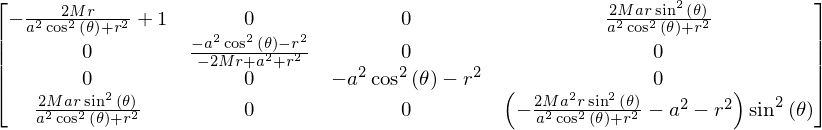

In [3]:
g.tensor()

## Geodätische Bewegung eines Probekörpers in vorgegebener Kerr-Raumzeit 

Im Folgenden wird die Geodätengleichung in vorgegebener Kerr-Raumzeit (Boyer-Lindquist Koordinaten) betrachtet:
$$
\frac{d^2 x^\mu}{d\tau^2} +  \Gamma^\mu_{\nu \rho} \frac{d x^\nu}{d\tau} \frac{d x^\rho}{d\tau} ~=~ 0
$$
Die Geod&auml;tengleichung stellt ein System gekoppelter nichtlinearer Differentialgleichungen dar

$$
\begin{eqnarray}
&& \frac{d^2 t}{d\lambda^2} = -  \Gamma^0_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda} \\
&& \frac{d^2 r}{d\lambda^2} = -  \Gamma^1_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda}\\
&& \frac{d^2 \theta}{d\lambda^2} = -  \Gamma^2_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda}\\
&& \frac{d^2 \phi}{d\lambda^2} = -  \Gamma^3_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda} \quad ,
\end{eqnarray}
$$
wobei $\lambda$ ein affiner Parameter (z.B. die Eigenzeit $\tau$), t, r, $\theta$ und $\phi$ die Koordinaten und $\Gamma^\mu_{\nu \rho}$ die Christoffel Symbole zweiter Art darstellen.

Die Chistoffel Symbole (zweiter Art): 
$$ \Gamma^{\sigma}_{\mu \nu} = \frac{1}{2}g^{\sigma \alpha} \left( g_{\nu \alpha| \mu} + g_{\mu \alpha| \nu} - g_{\mu \nu| \alpha} \right)$$

Hier speziell $$ \Gamma^{1}_{1 1} = \Gamma^{r}_{r r}$$

ull


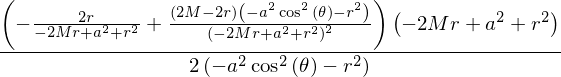

In [4]:
chr = ChristoffelSymbols.from_metric(g)
print(chr.config)
chr.tensor()[1,1,1]

Wir definieren zunächst den ersten Term der Geodätengleichung $\frac{d^2 x^\mu}{d\tau^2}$:

In [5]:
tau = symbols('tau')
x0 = Function('t')(tau)
x1 = Function('r')(tau)
x2 = Function('\\theta')(tau)
x3 = Function('\\phi')(tau)

In [6]:
xmu=GenericVector([x0, x1, x2, x3],[t, r, theta, phi], config='u',parent_metric=Metric)
xmu.tensor()

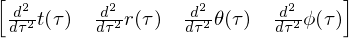

In [7]:
Geod1=diff(xmu.tensor(),tau,tau)
Geod1

und nun den zweiten Term $\Gamma^\mu_{\nu \rho} \frac{d x^\nu}{d\tau} \frac{d x^\rho}{d\tau}$:

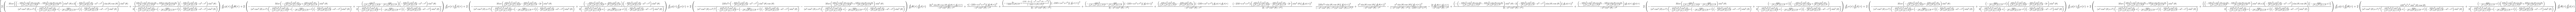

In [8]:
Geod2T=tensorproduct(chr.tensor(),diff(xmu.tensor(),tau),diff(xmu.tensor(),tau))
Geod2=tensorcontraction(Geod2T, (1, 3),(2,4))
Geod2

Die Geodätengleichung ist somit ein System von nichtlinearen gekoppelten Differentialgleichungen zweiter Ordnung. Die entsprechenden vier Gleichungen lauten:

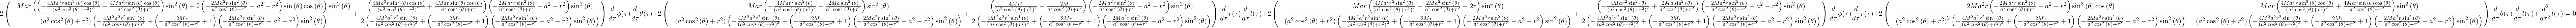

In [9]:
Geod=Geod1+Geod2
GeodEq0=Eq(Geod[0],0)
GeodEq0

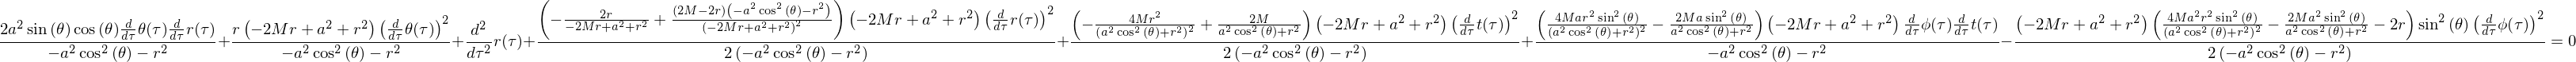

In [10]:
GeodEq1=Eq(Geod[1],0)
GeodEq1

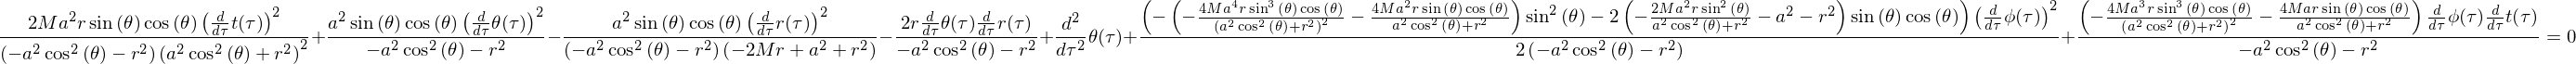

In [11]:
GeodEq2=Eq(Geod[2],0)
GeodEq2

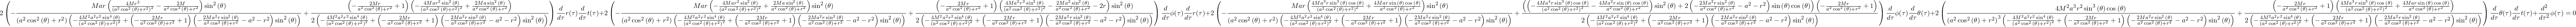

In [12]:
GeodEq3=Eq(Geod[3],0)
GeodEq3

Literatur:

<ol>
   <li><i>General relativity : An introduction for physicists</i> von M. P. Hobson, G. P. Efstathiou und A. N. Lasenby</li>
   <li><i>Gravity : An introduction to Einstein's general relativity</i> von James B. Hartle</li>
</ol>

In der Literatur wird die Bewegung eines Probekörpers um ein rotierendes schwarzes Loch mittels eines definierten, effektiven Potentials illustriert 

$$
V_{\rm eff}(r,a,l,e)=\frac{- M r^{2} - M \left(e a - l\right)^{2} + \frac{1}{2}\left(r \left(a^{2} \left(- e^{2} + 1\right) + l^{2}\right)\right)}{r^{3}}
$$
, wobei die zweite Geodätengleichung (radiale Gleichung) sich dann nach Integration wie folgt schreibt (siehe z.B. Hartle Buch, Seite 318):

$$
\begin{equation}
\frac{1}{2} \left( \frac{dr}{d\tau}  \right)^2 + V_{\rm eff}(r,a,l,e) = \frac{1}{2} \left(  e^2 -1 \right) 
\end{equation}
$$

Das Potential $V_{\rm eff}(r,a,l,e)$ hängt von dem, bei der Bewegung erhaltenem Drehimpuls $l$ pro Masse m, der Probekörper-Energie $e$ pro Masse und dem Kerr-Rotationsparameter $a$ ab. Die im Zentralfeld möglichen Bewegungen um ein rotierendes schwarzes Loch werden somit mittels zweier erhaltener Größen (l: Drehimpuls pro Masse m und e: Energie pro Masse) charakterisiert. Die folgende Abbildung zeigt (in der Nomenklatur vom Hartle-Buch) das effektive Potential als Funktion des Radius bei den folgenden Anfangswerten der Bewegung: $M=1, \, a=0.95, \, r_0=10, \, \theta_0=\pi/2, \, \phi_0=0,  \, \left.\frac{dr}{d\tau}\right|_{\tau=0}=0, \, \left.\frac{d\theta}{d\tau}\right|_{\tau=0}=0, \, \left.\frac{d\phi}{d\tau}\right|_{\tau=0}=0.041$. 

Die weitere nötige Anfangsbedingung ( $\left. \frac{dt}{d\tau} \right|_{\tau=0}$ ) erhalten wir mittels der Bedingung $\left( \frac{ds}{d\tau} \right)^2= g_{\mu\nu} \frac{dx^\mu}{d\tau} \frac{dx^\nu}{d\tau} = g_{\mu\nu} u^\mu u^\nu = 1$, die für massive Probekörper immer erfüllt sein muss ($u^\mu$ ist die Vierergeschwindigkeit des Probekörpers). Die Gleichung für das infinitesimale Weglängenelement $ds^2=1$ in der Ebene lautet:

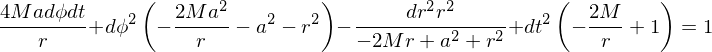

In [13]:
dt, dr, dtheta, dphi = symbols('dt, dr, d\\theta, d\\phi')
dx=GenericVector([dt, dr, dtheta, dphi],[t, r, theta, phi], config='u',parent_metric=Metric)
dxdx=tensorproduct(dx.tensor(),dx.tensor())
dxdxT=Tensor(dxdx,config="uu")
ds2a=tensorproduct(g.tensor(),dxdxT.tensor())
ds2aT=Tensor(ds2a,config="lluu")
ds2=tensorcontraction(ds2aT.tensor(), (0, 2),(1, 3))
Eq_ds=Eq(ds2.subs({(theta,pi/2),(dtheta,0)}),1)
Eq_ds

Wir lösen diese Gleichung nach $dt$ auf:

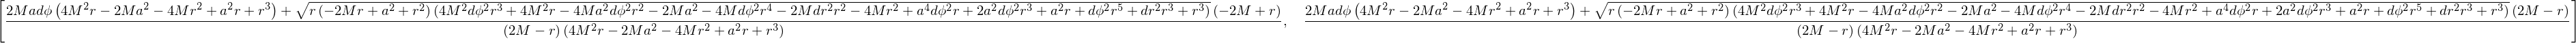

In [14]:
LoesEq_ds=solve(Eq_ds,dt)
LoesEq_ds

Einsetzen der oben genannten Anfangsbedingungen in die zweite Lösung (positive Lösung) liefert für unsere Anfangsbedingungen $\left. \frac{dt}{d\tau} \right|_{\tau=0}=1.19959929041707$. Die Anfangsbedingungen lauten somit:

In [15]:
import numpy as np

In [16]:
t0=0.0
seta=0.95
r0=10.0
theta0=np.pi/2
phi0=0.0
dr0=0.0
dtheta0=0.0
dphi0=0.041
dt0=float(LoesEq_ds[1].subs({(r,r0),(a,seta),(dr,dr0),(dphi,dphi0),(M,1)}))
dt0

Die Werte für den Drehimpuls des Teilchens pro Masse ($l=\frac{L}{m}$) und der Teilchenenergie pro Masse ($e=\frac{E}{m}$) des Probekörpers lassen sich mittels der Definition des Viererimpulses $p_\mu = m \, u_\mu = m \, g_{\mu\nu} \frac{dx^\nu}{d\tau} $ bestimmen. Für die Kerr-Metrik erhält man:

$$
\begin{eqnarray}
p_0 &=& p_t = m \, u_t =  m \,\left(  g_{00} \frac{dx^0}{d\tau} +  g_{03} \frac{dx^3}{d\tau} \right) =  m \,\left(  g_{tt} \frac{dt}{d\tau} +  g_{t\phi} \frac{d\phi}{d\tau} \right) = m \, e
\\
p_3 &=& p_\phi = m \, u_\phi =  m \,\left(  g_{30} \frac{dx^0}{d\tau} +  g_{33} \frac{dx^3}{d\tau} \right) =  m \,\left(  g_{\phi t} \frac{dt}{d\tau} +  g_{\phi\phi} \frac{d\phi}{d\tau} \right) = - m \, l
\end{eqnarray}
$$

In der Äquatorialebene sind die Zeit- und $\phi$-Komponente der Viergeschwindigkeit somit wie folgt gegeben (siehe Hartle-Buch, S:318 und Hobson-Buch, S: 331): 

$$
\begin{eqnarray}
\frac{dt}{d\tau} &=& \frac{1}{\Delta} \left( e\left( r^2+a^2+2Ma^2/r \right) -2Mla/r \right)\\
\frac{d\phi}{d\tau} &=& \frac{1}{\Delta} \left( l\left( 1-2M/r \right) +2Mea/r \right)
\end{eqnarray}
$$

Wir lösen diese Gleichungen nach $e$ und $l$ auf:

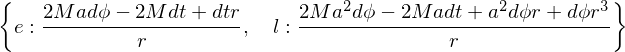

In [17]:
l = symbols('l')
e = symbols('e')
Eqdt=Eq(dt,1/Delta*((r**2+a**2+2*M*a**2/r)*e-2*M*a/r*l))
Eqdphi=Eq(dphi,1/Delta*((1-2*M/r)*l+2*M*a/r*e))
LoesEqdtEqdphi=solve({Eqdt,Eqdphi},(e,l))
LoesEqdtEqdphi

Einsetzen unserer Anfangswerte ergibt für die Energie $e$:

In [18]:
LoesEqdtEqdphi=list(LoesEqdtEqdphi.values())
LoesEqdtEqdphi
setE=LoesEqdtEqdphi[0].subs({(r,r0),(a,seta),(dphi,dphi0),(dt,dt0),(M,1)})
setE

Einsetzen unserer Anfangswerte ergibt für die Dehimpuls $l$:

In [19]:
setl=LoesEqdtEqdphi[1].subs({(r,r0),(a,seta),(dphi,dphi0),(dt,dt0),(M,1)})
setl

In [20]:
import matplotlib.pyplot as plt 
import matplotlib

In [21]:
VeffHartleRot=-M/r+(l**2-a**2*(e**2-1))/(2*r**2)-M*(l-a*e)**2/r**3
VeffHartleRotl=lambdify((r,a,l,e),VeffHartleRot.subs({(M,1)}))
rval = np.linspace(1.4,30, 1001)

In [22]:
params = {
    'figure.figsize'    : [10,8],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

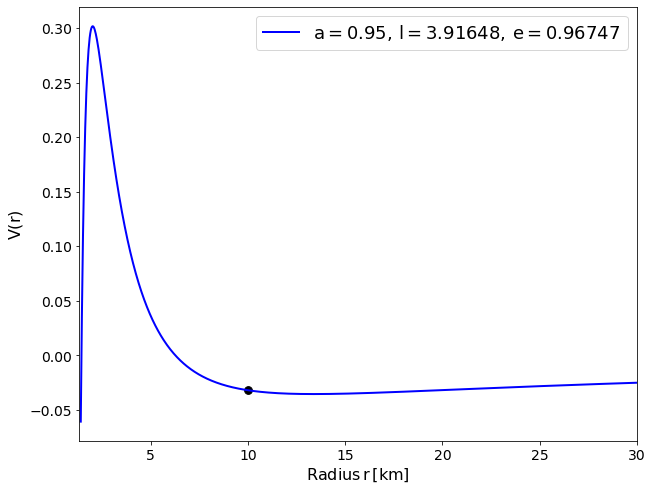

In [23]:
plt.cla()
plt.xlim(1.3, 30)
#plt.ylim(0.8, 1.1)
plt.ylabel(r"$\rm V(r)$")
plt.xlabel(r"$\rm Radius \, r \,[km]$")
plt.plot(rval,VeffHartleRotl(rval,0.95,setl,setE), linewidth=2, color="blue",label=r"$\rm a=0.95, \, l=3.91648, \, e=0.96747$");
plt.scatter(10,VeffHartleRotl(10,0.95,setl,setE), marker="o", color="black", s=60);
plt.legend(loc='upper right', fontsize=18);

Man erkennt in der oberen Abbildung, dass der entstehende Orbit eine gebundene elliptische Bahn um das rotierende schwarze Loch ergeben wird. Die Trajektorie des Probekörpers veranschaulichen wir uns, indem wir die Geodätengleichung mit den oberen Anfangsbedingungen nummerisch berechnen. Die drei relevanten Geodätengleichungen in der äquatorialen Ebene lauten ($\theta=\frac{\pi}{2}, {\rm cos}(\theta)=0, {\rm sin}(\theta)=1, \frac{d \theta}{d\tau}=0, \frac{d^2 \theta}{d\tau^2}=0$):

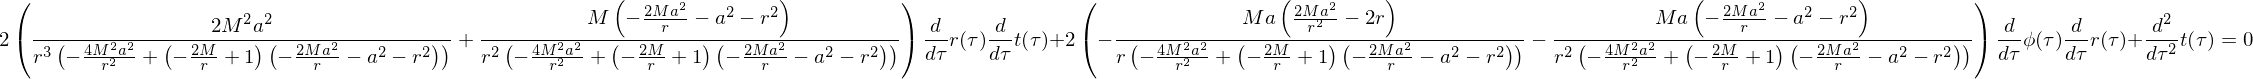

In [24]:
GeodEq0=GeodEq0.subs({(theta,pi/2),(diff(theta,tau),0)})
GeodEq0

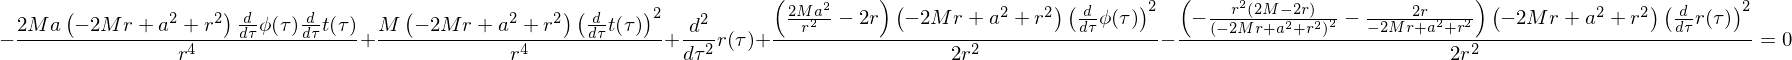

In [25]:
GeodEq1=GeodEq1.subs({(theta,pi/2),(diff(x2,tau),0)})
GeodEq1

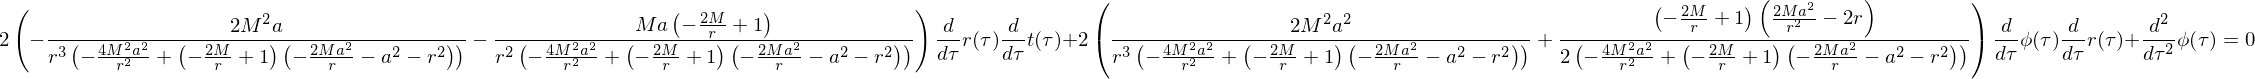

In [26]:
GeodEq3=GeodEq3.subs({(theta,pi/2),(diff(x2,tau),0)})
GeodEq3

Um dieses System von drei Differentialgleichungen zweiter Ordnung mit Python nummerisch lösen zu können, müssen wir es zunächst in ein System von sechs Differentialgleichungen erster Ordnung umschreiben. Wir definieren dazu formal: $y_1=\frac{dt}{d\tau}$, $y_2=\frac{dr}{d\tau}$, $y_3=\frac{d\phi}{d\tau}$, $y_4=\frac{dy_1}{d\tau}=\frac{d^2t}{d\tau^2}$, $y_5=\frac{dy_1}{d\tau}=\frac{dy_2}{d\tau}=\frac{d^2r}{d\tau^2}$ und $y_6=\frac{dy_3}{d\tau}=\frac{d^2\phi}{d\tau^2}$. Wir legen des Weiteren die Masse des schwarzen Loches auf $M=1$ fest.

In [27]:
y1, y2, y3 = symbols('y_1, y_2, y_3')

In [28]:
F0=solve(GeodEq0,diff(x0,tau,tau))[0]
F1=solve(GeodEq1,diff(x1,tau,tau))[0]
F3=solve(GeodEq3,diff(x3,tau,tau))[0]

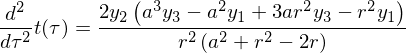

In [29]:
Eq(diff(x0,tau,tau),F0.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1)}))

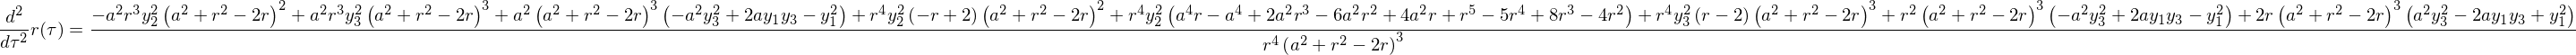

In [30]:
Eq(diff(x1,tau,tau),F1.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1)}))

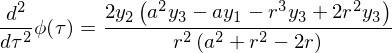

In [31]:
Eq(diff(x3,tau,tau),F3.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1)}))

Des Weiteren setzen wir den Kerr-Rotationsparameter auf $a=0.95$.

In [32]:
seta=0.95

In [33]:
y4=lambdify((r,y1,y2,y3), F0.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1),(a,seta)}))

In [34]:
y5=lambdify((r,y1,y2,y3), F1.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1),(a,seta)}))

In [35]:
y6=lambdify((r,y1,y2,y3), F3.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(diff(x3,tau),y3),(M,1),(a,seta)}))

Wir definieren das System der gekoppelten sechs Differentialgleichungen:

In [36]:
def DGLsys(vy, time):
    t, r, phi, y1, y2, y3 = vy
    dt = y1
    dr = y2
    dphi = y3
    dy1 = y4(r,y1,y2,y3)
    dy2 = y5(r,y1,y2,y3)
    dy3 = y6(r,y1,y2,y3)
    return np.array([dt,dr,dphi,dy1,dy2,dy3])

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

Wir lösen das System der Differentialgleichungen mit den oberen Anfangsbedingungen nummerisch:

In [38]:
numpoints=100001
tauval = np.linspace(0, 800, numpoints)

initialval = np.array([t0,r0,phi0,dt0,dr0,dphi0])

Loes = integrate.odeint(DGLsys, initialval, tauval)

In [39]:
params = {
    'figure.figsize'    : [10,8],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

Zusätzlich zur Trajektorie veranschaulichen wir uns die Horizont-Struktur des rotierenden schwarzen Lochs:

In [40]:
EqHorizonte=Eq(g.inv()[1,1],0)
LoesEqHorizonte=solve(EqHorizonte,r)
EqUnRot=Eq(g.tensor()[0,0],0)
LoesEqUnRot=solve(EqUnRot,r)

PlotHplus=lambdify((a), LoesEqHorizonte[1].subs({(M,1)}))
PlotHminus=lambdify((a), LoesEqHorizonte[0].subs({(M,1)}))
PlotUnRotplus=lambdify((a,theta), LoesEqUnRot[1].subs({(M,1)}))
PlotUnRotminus=lambdify((a,theta), LoesEqUnRot[0].subs({(M,1)}))

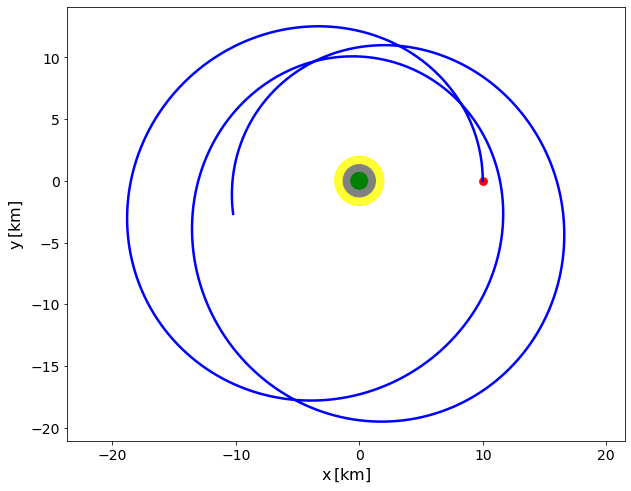

In [41]:
ax = plt.gca()
ax.cla() 
ax.set_ylabel(r"$\rm y \,[km]$")
ax.set_xlabel(r"$\rm x \,[km]$")
ax.plot(Loes[:, 1]*np.cos(Loes[:, 2]),Loes[:, 1]*np.sin(Loes[:, 2]),c="blue", linewidth=2.5, linestyle='-');
ax.scatter(Loes[0, 1]*np.cos(Loes[0, 2]),Loes[0, 1]*np.sin(Loes[0, 2]),c="red", s=60, marker='o');
PUnRotplus=plt.Circle((0, 0), PlotUnRotplus(0.95,np.pi/2), color='yellow',alpha=0.8)
ax.add_patch(PUnRotplus);
PHplus=plt.Circle((0, 0), PlotHplus(0.95), color='grey')
ax.add_patch(PHplus);
PHminus=plt.Circle((0, 0), PlotHminus(0.95), color='green')
ax.add_patch(PHminus);
plt.axis('equal');

Die obere Abbildung zeigt die Trajektorie der elliptischen Bewegung des Probekörpers um das rotierende schwarze Loch. Das rotierende schwarze Loch ist wieder wie folgt visualisiert: Der Bereich der Ergosph&auml;re des rotierenden schwarzen Loches (Bereich zwischen der &auml;u&szlig;eren Fl&auml;che unendlicher Rotverschiebung (r<sub>s<sub>+</sub></sub>) und dem &auml;u&szlig;eren Ereignishorizont (r<sub>+</sub>)) ist gelb, der Bereich zwischen dem &auml;u&szlig;eren und inneren Ereignishorizont (Bereich zwischen r<sub>-</sub> und r<sub>+</sub>) ist grau und für den inneren grünen Bereich gilt r<r<sub>-</sub>.

Wir betrachten uns wieder die Erhaltungsgrößen der Bewegung: l (Drehimpuls pro Masse m), e (Teilchenenergie pro Masse) und das Weglängenelement $ds^2$.

In [42]:
import matplotlib.gridspec as gridspec
Drehimpuls=lambdify((r,dphi,dt), LoesEqdtEqdphi[1].subs({(a,seta),(M,1)})) 
Energie=lambdify((r,dphi,dt), LoesEqdtEqdphi[0].subs({(a,seta),(M,1)}))
InfWeg=lambdify((r,dr,dphi,dt),Eq_ds.lhs.subs({(a,seta),(M,1)}))

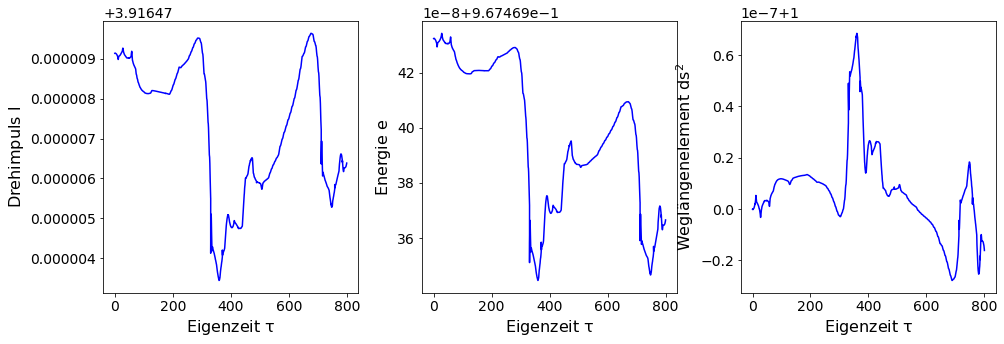

In [43]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.set_ylabel(r"$\rm Drehimpuls \,\,l$")
ax1.set_xlabel(r"$\rm Eigenzeit \,\,\tau$")
ax2.set_ylabel(r"$\rm Energie \,\,e $")
ax2.set_xlabel(r"$\rm Eigenzeit \,\,\tau$")
ax3.set_ylabel(r"$\rm Weglängenelement \,\,ds^2$")
ax3.set_xlabel(r"$\rm Eigenzeit \,\,\tau$")

datal=Drehimpuls(Loes[:, 1],Loes[:, 5],Loes[:, 3])
dataE=Energie(Loes[:, 1],Loes[:, 5],Loes[:, 3])
datads2=InfWeg(Loes[:, 1],Loes[:, 4],Loes[:, 5],Loes[:, 3])

ax1.plot(tauval,datal,c="blue", linewidth=1.5, linestyle='-');
ax2.plot(tauval,dataE,c="blue", linewidth=1.5, linestyle='-');
ax3.plot(tauval,datads2,c="blue", linewidth=1.5, linestyle='-');

### Kreisförmige Bewegung eines Probekörpers und der ISCO 

Wir betrachten im Folgenden die kreisförmige Bewegung eines Probekörpers um ein rotierendes schwarzes Loch. Ähnlich wie im nicht-rotierenden Fall charakterisieren wir die unterschiedlichen Bahnbewegungen mittels des oben definierten effektiven Potentials. Wir beschränken uns im Folgenden auf äquatoriale, kreisförmige Bewegungen.

Bei kreisförmige Bewegungen muss die Ableitung des effektiven Potentials nach r verschwinden ($\frac{\partial V_{\rm eff}(r,a,l,e)}{dr}=0$): 

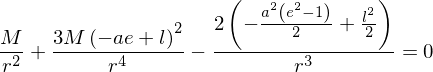

In [44]:
Eq1Kreis=Eq(diff(VeffHartleRot,r),0)
Eq1Kreis

Zusätzlich ist bei radialen Bewegungen der Radius während der Bewegung konstant, sodass $\frac{dr}{d\tau}=0$ ist. Es gilt somit für radiale Bewegungen:

$$
\begin{equation}
\frac{1}{2} \left( \frac{dr}{d\tau}  \right)^2 + V_{\rm eff}(r,a,l,e) = V_{\rm eff}(r,a,l,e) = \frac{1}{2} \left(  e^2 -1 \right) 
\end{equation}
$$

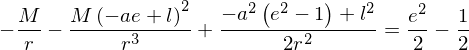

In [45]:
Eq2Kreis=Eq(VeffHartleRot,(e**2-1)/2)
Eq2Kreis

Wir wollen nun eine kreisförmige Bahn im Abstand $r=10$ um ein rotierendes schwarzes Loch ($M=1, \, a=0.95$) simulieren und setzen diese Größen zunächst in die beiden oberen Gleichungen ein:

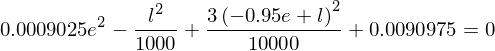

In [46]:
r0a=10
Gl1=Eq1Kreis.subs({(M,1),(a,seta),(r,r0a)})
Gl1

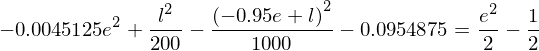

In [47]:
Gl2=Eq2Kreis.subs({(M,1),(a,seta),(r,r0a)})
Gl2

Diese beiden Gleichungen können wir nach e und l auflösen:

In [48]:
setELa=solve(Gl1.subs({(l,solve(Gl2,l)[1])}).simplify(),e)
setELa=setELa[1]
setELa

In [49]:
setlLa=solve(Gl1.subs({(e,setELa)}),l)
setlLa=setlLa[1]
setlLa

Des Weiteren gelten auch weiterhin die Gleichungen

$$
\begin{eqnarray}
\frac{dt}{d\tau} &=& \frac{1}{\Delta} \left( e\left( r^2+a^2+2Ma^2/r \right) -2Mla/r \right)\\
\frac{d\phi}{d\tau} &=& \frac{1}{\Delta} \left( l\left( 1-2M/r \right) +2Mea/r \right)
\end{eqnarray}
$$

, durch die wir unsere noch offenen Anfangsbedingungen festlegen können.

In [50]:
Gl3a=Eqdt.subs({(M,1),(a,seta),(r,r0a),(e,setELa),(l,setlLa)})
Gl3a

In [51]:
Gl4a=Eqdphi.subs({(M,1),(a,seta),(r,r0a),(e,setELa),(l,setlLa)})
Gl4a

Zusätzlich wollen wir eine weitere kreisförmige Bahn im Abstand $r=8$ simulieren und berechnen hierfür die Anfangsbedingungen:

In [52]:
r0b=8
Gl1=Eq1Kreis.subs({(M,1),(a,seta),(r,r0b)})
Gl2=Eq2Kreis.subs({(M,1),(a,seta),(r,r0b)})
setELb=solve(Gl1.subs({(l,solve(Gl2,l)[1])}).simplify(),e)
setELb=setELb[1]
setlLb=solve(Gl1.subs({(e,setELb)}),l)
setlLb=setlLb[1]
Gl3b=Eqdt.subs({(M,1),(a,seta),(r,r0b),(e,setELb),(l,setlLb)})
Gl4b=Eqdphi.subs({(M,1),(a,seta),(r,r0b),(e,setELb),(l,setlLb)})

Wir stellen nun beide kreisförmige Lösungen zusammen mit der simulierten elliptischen Bahn dar:

In [53]:
t0=0.0
seta=0.95
theta0=np.pi/2
phi0=0.0
dr0=0.0
dtheta0=0.0
dphi0a=float(Gl4a.rhs)
dt0a=float(Gl3a.rhs)
dphi0b=float(Gl4b.rhs)
dt0b=float(Gl3b.rhs)

In [54]:
numpoints=100001
tauval = np.linspace(0, 800, numpoints)

initialvalCirca = np.array([t0,r0a,phi0,dt0a,dr0,dphi0a])
initialvalCircb = np.array([t0,r0b,phi0,dt0b,dr0,dphi0b])

LoesCirca = integrate.odeint(DGLsys, initialvalCirca, tauval)
LoesCircb = integrate.odeint(DGLsys, initialvalCircb, tauval)

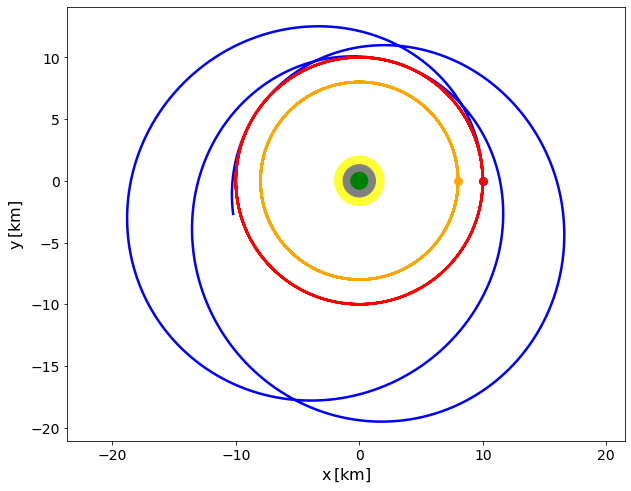

In [55]:
ax = plt.gca()
ax.cla() 
ax.set_ylabel(r"$\rm y \,[km]$")
ax.set_xlabel(r"$\rm x \,[km]$")
ax.plot(Loes[:, 1]*np.cos(Loes[:, 2]),Loes[:, 1]*np.sin(Loes[:, 2]),c="blue", linewidth=2.5, linestyle='-');
ax.scatter(Loes[0, 1]*np.cos(Loes[0, 2]),Loes[0, 1]*np.sin(Loes[0, 2]),c="blue", s=60, marker='o');

ax.plot(LoesCirca[:, 1]*np.cos(LoesCirca[:, 2]),LoesCirca[:, 1]*np.sin(LoesCirca[:, 2]),c="red", linewidth=2.5, linestyle='-');
ax.scatter(LoesCirca[0, 1]*np.cos(LoesCirca[0, 2]),LoesCirca[0, 1]*np.sin(LoesCirca[0, 2]),c="red", s=60, marker='o');

ax.plot(LoesCircb[:, 1]*np.cos(LoesCircb[:, 2]),LoesCircb[:, 1]*np.sin(LoesCircb[:, 2]),c="orange", linewidth=2.5, linestyle='-');
ax.scatter(LoesCircb[0, 1]*np.cos(LoesCircb[0, 2]),LoesCircb[0, 1]*np.sin(LoesCircb[0, 2]),c="orange", s=60, marker='o');


PUnRotplus=plt.Circle((0, 0), PlotUnRotplus(0.95,np.pi/2), color='yellow',alpha=0.8)
ax.add_patch(PUnRotplus);
PHplus=plt.Circle((0, 0), PlotHplus(0.95), color='grey')
ax.add_patch(PHplus);
PHminus=plt.Circle((0, 0), PlotHminus(0.95), color='green')
ax.add_patch(PHminus);
plt.axis('equal');

Die innerste kreisförmige Bahnbewegung (ISCO) hat zusätzlich die Eigenschaft, dass das Maximum und Minimum des effektiven Potentials zu einem Sattelpunkt zusammen fällt - es muss somit zusätzlich gelten: $\frac{d^2V_{\rm eff}(r,a,l,e)}{d^2r}=0$

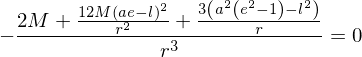

In [56]:
EqISCO=Eq(diff(VeffHartleRot,r,r),0)
EqISCO

Benutzt man zusätzlich die Gleichung $\frac{dV_{\rm eff}(r,a,l,e)}{dr}=0$ und löst diese nach $E$ auf und setzt diesen Ausdruck dann in die obere Gleichung ein, erhält man folgende Gleichung: 

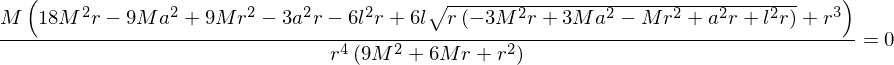

In [57]:
EqISCO.subs({(e,solve(Eq1Kreis,e)[1])}).simplify()

Löst man diese Gleichung nach $l$ auf, erhält man zwei mögliche Lösungen für den Drehimpuls des Probekörpers:

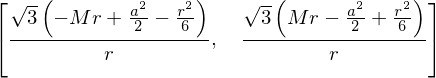

In [58]:
lISCO=solve(EqISCO.subs({(e,solve(Eq1Kreis,e)[1])}),l)
lISCO

Wir wollen nun den ISCO unseres rotierenden schwarzen Loch ($M=1, \, a=0.95$) simulieren und setzen diese Größen zunächst in die obere Gleichung $\frac{d^2V_{\rm eff}(r,a,l,e)}{d^2r}=0$ ein:

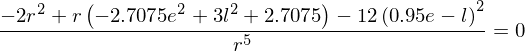

In [59]:
set_EqISCO=EqISCO.subs({(M,1),(a,seta)}).simplify()
set_EqISCO

Wir lösen diese Gleichung nach $e$ auf und substituieren den gefundenen Ausdruck für $l$. 

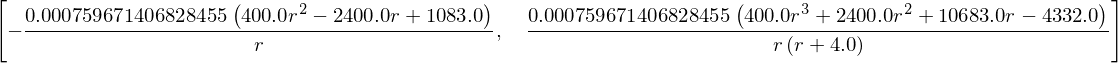

In [60]:
EIscoa=solve(set_EqISCO.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)
EIscoa

Zusätzlich verwenden wir die Gleichung 
$$
\begin{equation}
 V_{\rm eff}(r,a,l,e) = \frac{1}{2} \left(  e^2 -1 \right) 
\end{equation}
$$

mit $M=1$ und $a=0.95$.

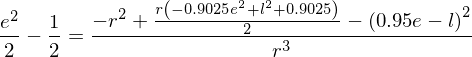

In [61]:
set_Eq2Kreis=Eq2Kreis.subs({(M,1),(a,seta)}).simplify()
set_Eq2Kreis

Auch diese Gleichung lösen wir nach $e$ auf und substituieren den gefundenen Ausdruck für $l$.

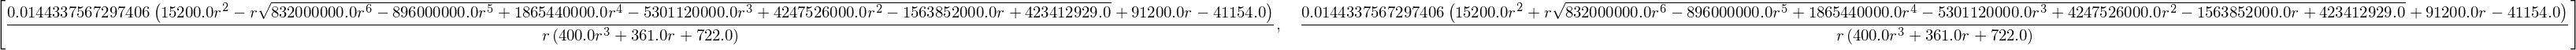

In [62]:
EIscob=solve(Eq2Kreis.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)
EIscob

Da die beiden berechneten Ausdrücke für die Energie (EIscoa un EIscob) gleich sein müssen, kann man sich den Radiuswert nummerisch berechnen. Man erhält die folgenden beiden Radiuswerte:

In [63]:
from scipy.optimize import fsolve

In [64]:
EIscoal=lambdify(r, EIscoa[0])
EIscobl=lambdify(r, EIscob[0])
func1 = lambda r : EIscoal(r)-EIscobl(r)

In [65]:
r_initial_guess = 10
r_ISCO1 = fsolve(func1,r_initial_guess)
r_ISCO1[0]

In [66]:
EIscoal=lambdify(r, EIscoa[0])
EIscobl=lambdify(r, EIscob[1])
func2 = lambda r : EIscoal(r)-EIscobl(r)

In [67]:
r_initial_guess = 10
r_ISCO2 = fsolve(func2,r_initial_guess)
r_ISCO2[0]

Wir berechnen uns die zugehörigen Werte der Energie $e$ und des Drehimpulses $l$ und stellen uns die beiden effektiven Potentiale dar: (e,l) =

In [68]:
set_EIscoa=-EIscoa[0].subs({(r,r_ISCO1[0])}).evalf()
set_lISCOa=lISCO[0].subs({(M,1),(a,seta),(r,r_ISCO1[0])}).evalf()
print(set_EIscoa,set_lISCOa)

0.961637778516978 -4.20120750491675


In [69]:
set_EIscob=EIscoa[0].subs({(r,r_ISCO2[0])}).evalf()
set_lISCOb=lISCO[1].subs({(M,1),(a,seta),(r,r_ISCO2[0])}).evalf()
print(set_EIscob,set_lISCOb)

0.809856420141674 1.88782840956287


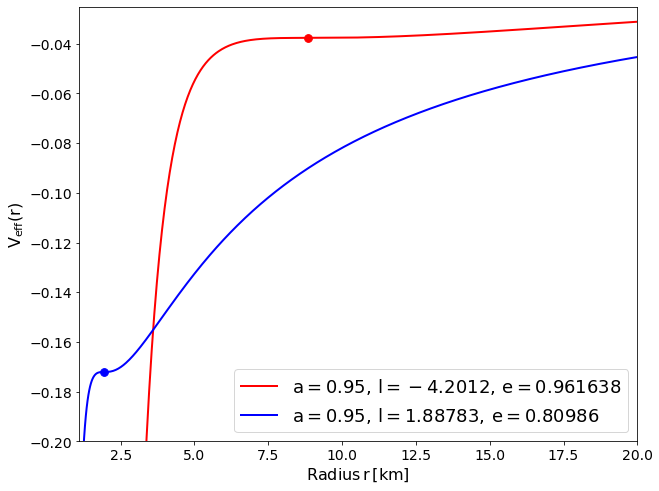

In [70]:
rval = np.linspace(1.0,30, 1001)
plt.cla()
plt.xlim(1.1, 20)
plt.ylim(-0.2, -0.025)
plt.ylabel(r"$\rm V_{eff}(r)$")
plt.xlabel(r"$\rm Radius \, r \,[km]$")
plt.plot(rval,VeffHartleRotl(rval,0.95,set_lISCOa,set_EIscoa), linewidth=2, color="red",label=r"$\rm a=0.95, \, l=-4.2012, \, e=0.961638$");
plt.scatter(r_ISCO1[0],VeffHartleRotl(r_ISCO1[0],0.95,set_lISCOa,set_EIscoa), marker="o", color="red", s=60);
plt.plot(rval,VeffHartleRotl(rval,0.95,set_lISCOb,set_EIscob), linewidth=2, color="blue",label=r"$\rm a=0.95, \, l=1.88783, \, e=0.80986$");
plt.scatter(r_ISCO2[0],VeffHartleRotl(r_ISCO2[0],0.95,set_lISCOb,set_EIscob), marker="o", color="blue", s=60);

plt.legend(loc='lower right', fontsize=18);

Wir stellen uns diese beiden Lösungen des co- und contra-rotierenden ISOCs in einer Animation dar. Zusätzlich visualisieren wir uns auch eine instabile contra-rotierenden Trajektorie.

In [71]:
t0=0.0
seta=0.95
theta0=np.pi/2
phi0=0.0
dr0=0.0
dtheta0=0.0

r0a=r_ISCO1[0]
dphi0a=float(Eqdphi.subs({(M,1),(a,seta),(r,r_ISCO1[0]),(e,set_EIscoa),(l,set_lISCOa)}).evalf().rhs)
dt0a=float(Eqdt.subs({(M,1),(a,seta),(r,r_ISCO1[0]),(e,set_EIscoa),(l,set_lISCOa)}).evalf().rhs)
r0b=r_ISCO2[0]
dphi0b=float(Eqdphi.subs({(M,1),(a,seta),(r,r_ISCO2[0]),(e,set_EIscob),(l,set_lISCOb)}).evalf().rhs)
dt0b=float(Eqdt.subs({(M,1),(a,seta),(r,r_ISCO2[0]),(e,set_EIscob),(l,set_lISCOb)}).evalf().rhs)

r0c=r_ISCO1[0]-0.6
dphi0c=float(Eqdphi.subs({(M,1),(a,seta),(r,r0c),(e,set_EIscoa),(l,set_lISCOa)}).evalf().rhs)
dt0c=float(Eqdt.subs({(M,1),(a,seta),(r,r0c),(e,set_EIscoa),(l,set_lISCOa)}).evalf().rhs)

In [72]:
numpoints=100001
tauval = np.linspace(0, 180, numpoints)

initialvalIscoa = np.array([t0,r0a,phi0,dt0a,dr0,dphi0a])
initialvalIscob = np.array([t0,r0b,phi0,dt0b,dr0,dphi0b])
initialvalc= np.array([t0,r0c,phi0,dt0c,dr0,dphi0c])

LoesIscoa = integrate.odeint(DGLsys, initialvalIscoa, tauval)
LoesIscob = integrate.odeint(DGLsys, initialvalIscob, tauval)
Loesc = integrate.odeint(DGLsys, initialvalc, tauval)

/home/hanauske/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [73]:
import matplotlib.animation as animation
from IPython.display import HTML

In [74]:
step=460
anzframes=200
xylim=11
fig = plt.figure(figsize=(10,10))
ax1 = plt.gca()

def init():
    ax1.scatter(LoesIscoa[0, 1]*np.cos(LoesIscoa[0, 2]),LoesIscoa[0, 1]*np.sin(LoesIscoa[0, 2]),c="red", s=60, marker='o');
    ax1.scatter(LoesIscob[0, 1]*np.cos(LoesIscob[0, 2]),LoesIscob[0, 1]*np.sin(LoesIscob[0, 2]),c="blue", s=60, marker='o');
    ax1.scatter(Loesc[0, 1]*np.cos(Loesc[0, 2]),Loesc[0, 1]*np.sin(Loesc[0, 2]),c="black", s=60, marker='o');

    PUnRotplus=plt.Circle((0, 0), PlotUnRotplus(0.95,np.pi/2), color='yellow',alpha=0.8)
    ax1.add_patch(PUnRotplus);
    PHplus=plt.Circle((0, 0), PlotHplus(0.95), color='grey')
    ax1.add_patch(PHplus);
    PHminus=plt.Circle((0, 0), PlotHminus(0.95), color='green')
    ax1.add_patch(PHminus);
    
    
    ax1.set_ylabel(r"$\rm y \,[km]$")
    ax1.set_xlabel(r"$\rm x \,[km]$")
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    return fig,

def animate(i):
    ax1.cla() 
    ax1.plot(LoesIscoa[:step*i, 1]*np.cos(LoesIscoa[:step*i, 2]),LoesIscoa[:step*i, 1]*np.sin(LoesIscoa[:step*i, 2]),c="red", linewidth=0.5, linestyle='-');
    ax1.scatter(LoesIscoa[step*i, 1]*np.cos(LoesIscoa[step*i, 2]),LoesIscoa[step*i, 1]*np.sin(LoesIscoa[step*i, 2]),c="red", s=60, marker='o');
    ax1.plot(LoesIscob[:step*i, 1]*np.cos(LoesIscob[:step*i, 2]),LoesIscob[:step*i, 1]*np.sin(LoesIscob[:step*i, 2]),c="blue", linewidth=0.5, linestyle='-');
    ax1.scatter(LoesIscob[step*i, 1]*np.cos(LoesIscob[step*i, 2]),LoesIscob[step*i, 1]*np.sin(LoesIscob[step*i, 2]),c="blue", s=60, marker='o');
    ax1.plot(Loesc[:step*i, 1]*np.cos(Loesc[:step*i, 2]),Loesc[:step*i, 1]*np.sin(Loesc[:step*i, 2]),c="black", linewidth=0.5, linestyle='-');
    ax1.scatter(Loesc[step*i, 1]*np.cos(Loesc[step*i, 2]),Loesc[step*i, 1]*np.sin(Loesc[step*i, 2]),c="black", s=60, marker='o');

    PUnRotplus=plt.Circle((0, 0), PlotUnRotplus(0.95,np.pi/2), color='yellow',alpha=0.8)
    ax1.add_patch(PUnRotplus);
    PHplus=plt.Circle((0, 0), PlotHplus(0.95), color='grey')
    ax1.add_patch(PHplus);
    PHminus=plt.Circle((0, 0), PlotHminus(0.95), color='green')
    ax1.add_patch(PHminus);
    ax1.set_ylabel(r"$\rm y \,[km]$")
    ax1.set_xlabel(r"$\rm x \,[km]$")
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=anzframes,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Die blaue Kurve beschreibt den inneren co-rotierenden ISCO (Probekörper rotiert in gleicher Richtung wie die Rotationsrichtung des schwarzen Loches). Der Orbit hält sich innerhalb der Ergosphäre auf (r=1.94 km) und rotiert viel schneller als der contra-rotierende ISCO (rote Kurve). Die schwarze Kurve beschreibt einen Probekörper der contra-rotierend in das schwarze Loch fällt. Vor dem Erreichen der Ergosphäre dreht dieser jedoch seine Rotationsrichtung um.

Wir berechnen uns im Folgenden die Radiuswerte der ISCOs bei Variation des Kerr-Rotationsparameters $a$ und stellen uns zusätzlich die entsprechenden Energie- und Drehimpulswerte dar.

In [75]:
aa=[]
r1=[]
r2=[]
e1=[]
e2=[]
l1=[]
l2=[]
for seta in np.linspace(0.000001, 0.9, 15):
    set_EqISCO=EqISCO.subs({(M,1),(a,seta)}).simplify()
    EIscoa=solve(set_EqISCO.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)
    set_Eq2Kreis=Eq2Kreis.subs({(M,1),(a,seta)}).simplify()
    EIscob=solve(Eq2Kreis.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)

    EIscoal=lambdify(r, EIscoa[0])
    EIscobl=lambdify(r, EIscob[0])
    func1 = lambda r : EIscoal(r)-EIscobl(r)
    r_initial_guess = 10
    r_ISCO1 = fsolve(func1,r_initial_guess)

    EIscoal=lambdify(r, EIscoa[0])
    EIscobl=lambdify(r, EIscob[1])
    func2 = lambda r : EIscoal(r)-EIscobl(r)
    r_initial_guess = 10
    r_ISCO2 = fsolve(func2,r_initial_guess)
    
    set_EIscoa=-EIscoa[0].subs({(r,r_ISCO1[0])}).evalf()
    set_lISCOa=lISCO[0].subs({(M,1),(a,seta),(r,r_ISCO1[0])}).evalf()

    set_EIscob=EIscoa[0].subs({(r,r_ISCO2[0])}).evalf()
    set_lISCOb=lISCO[1].subs({(M,1),(a,seta),(r,r_ISCO2[0])}).evalf()

    aa.append(seta)
    r1.append(r_ISCO2[0])
    r2.append(r_ISCO1[0])
    e1.append(set_EIscob)
    e2.append(set_EIscoa)
    l1.append(set_lISCOb)
    l2.append(set_lISCOa)

for seta in np.linspace(0.9, 0.99999999, 20):
    set_EqISCO=EqISCO.subs({(M,1),(a,seta)}).simplify()
    EIscoa=solve(set_EqISCO.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)
    set_Eq2Kreis=Eq2Kreis.subs({(M,1),(a,seta)}).simplify()
    EIscob=solve(Eq2Kreis.subs({(l,lISCO[1])}).subs({(M,1),(a,seta)}).simplify(),e)

    EIscoal=lambdify(r, EIscoa[0])
    EIscobl=lambdify(r, EIscob[0])
    func1 = lambda r : EIscoal(r)-EIscobl(r)
    r_initial_guess = 10
    r_ISCO1 = fsolve(func1,r_initial_guess)

    EIscoal=lambdify(r, EIscoa[0])
    EIscobl=lambdify(r, EIscob[1])
    func2 = lambda r : EIscoal(r)-EIscobl(r)
    r_initial_guess = 10
    r_ISCO2 = fsolve(func2,r_initial_guess)
    
    set_EIscoa=-EIscoa[0].subs({(r,r_ISCO1[0])}).evalf()
    set_lISCOa=lISCO[0].subs({(M,1),(a,seta),(r,r_ISCO1[0])}).evalf()

    set_EIscob=EIscoa[0].subs({(r,r_ISCO2[0])}).evalf()
    set_lISCOb=lISCO[1].subs({(M,1),(a,seta),(r,r_ISCO2[0])}).evalf()

    aa.append(seta)
    r1.append(r_ISCO2[0])
    r2.append(r_ISCO1[0])
    e1.append(set_EIscob)
    e2.append(set_EIscoa)
    l1.append(set_lISCOb)
    l2.append(set_lISCOa)

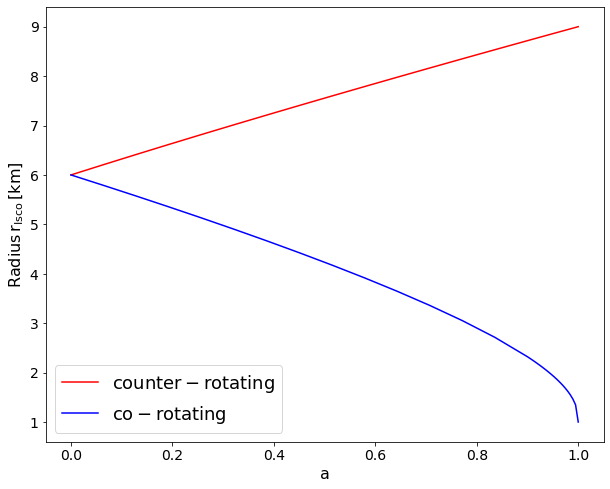

In [76]:
plt.ylabel(r"$\rm Radius \, r_{Isco} \,[km]$")
plt.xlabel(r"$\rm a$")
plt.plot(aa,r2,c="red",label=r"$\rm counter-rotating$");
plt.plot(aa,r1,c="blue",label=r"$\rm co-rotating$");
plt.legend(loc='lower left', fontsize=18);

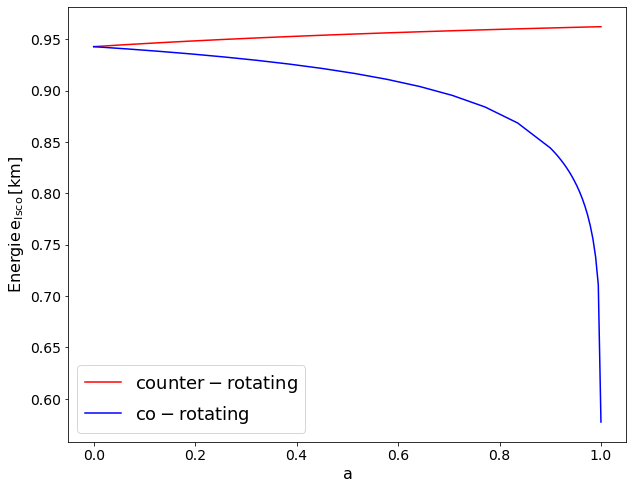

In [77]:
plt.ylabel(r"$\rm Energie \, e_{Isco} \,[km]$")
plt.xlabel(r"$\rm a$")
plt.plot(aa,e2,c="red",label=r"$\rm counter-rotating$");
plt.plot(aa,e1,c="blue",label=r"$\rm co-rotating$");
plt.legend(loc='lower left', fontsize=18);

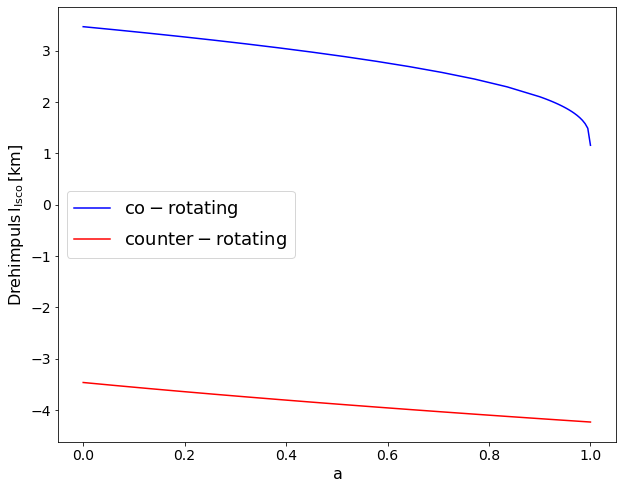

In [78]:
plt.ylabel(r"$\rm Drehimpuls \, l_{Isco} \,[km]$")
plt.xlabel(r"$\rm a$")
plt.plot(aa,l1,c="blue",label=r"$\rm co-rotating$");
plt.plot(aa,l2,c="red",label=r"$\rm counter-rotating$");
plt.legend(loc='center left', fontsize=18);

Bei maximaler Rotation ($a=1$) erhält man laut Literatur (siehe z.B. Hartle-Buch Seite: 321) die folgenden Werte: $r_{Isco}=M=1$, $e_{Isco}=\frac{1}{\sqrt{3}}\approx0.57735$ und $l_{Isco}=\frac{2M}{\sqrt{3}}\approx1.1547$

Wir überprüfen dies:

In [79]:
print("a=",aa[-1])
print("r=",r1[-1])
print("e=",e1[-1])
print("l=",l1[-1])

a= 0.99999999
r= 1.0000000438282637
e= 0.577350294493884
l= 1.15470060630828


Im Folgenden visualisieren wir die beiden effektiven Potentiale $V_{\rm eff}(r,a,l,e)$ der ISCOs bei Variation des Kerr-Rotationsparameters $a$ in einer Animation.

In [80]:
anzframes=len(aa)
xmax=15
xmin=0.5
ymin=-0.35
rval = np.linspace(xmin,xmax, 1001)
fig = plt.figure(figsize=(10,10))
ax1 = plt.gca()

def init():
    text1="a="+str(round(aa[0],3))+", l="+str(round(l1[0],3))+", e="+str(round(e1[0],3))
    text2="a="+str(round(aa[0],3))+", l="+str(round(l2[0],3))+", e="+str(round(e2[0],3))
    ax1.plot(rval,VeffHartleRotl(rval,aa[0],l1[0],e1[0]), linewidth=2, color="red",label=text1);
    ax1.scatter(r1[0],VeffHartleRotl(r1[0],aa[0],l1[0],e1[0]), marker="o", color="red", s=60);
    ax1.plot(rval,VeffHartleRotl(rval,aa[0],l2[0],e2[0]), linewidth=2, color="blue",label=text2);
    ax1.scatter(r2[0],VeffHartleRotl(r2[0],aa[0],l2[0],e2[0]), marker="o", color="blue", s=60);
    ax1.legend(loc='lower right', fontsize=18);
    ax1.set_ylabel(r"$\rm V(r)$")
    ax1.set_xlabel(r"$\rm Radius \, r \,[km]$")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, -0.025)
    return fig,

def animate(i):
    ax1.cla() 
    text1="a="+str(round(aa[i],3))+", l="+str(round(l1[i],3))+", e="+str(round(e1[i],3))
    text2="a="+str(round(aa[i],3))+", l="+str(round(l2[i],3))+", e="+str(round(e2[i],3))
    ax1.plot(rval,VeffHartleRotl(rval,aa[i],l1[i],e1[i]), linewidth=2, color="red",label=text1);
    ax1.scatter(r1[i],VeffHartleRotl(r1[i],aa[i],l1[i],e1[i]), marker="o", color="red", s=60);
    ax1.plot(rval,VeffHartleRotl(rval,aa[i],l2[i],e2[i]), linewidth=2, color="blue",label=text2);
    ax1.scatter(r2[i],VeffHartleRotl(r2[i],aa[i],l2[i],e2[i]), marker="o", color="blue", s=60);
    ax1.legend(loc='lower right', fontsize=18);
    ax1.set_ylabel(r"$\rm V_{eff}(r)$")
    ax1.set_xlabel(r"$\rm Radius \, r \,[km]$")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, -0.025)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=anzframes,interval=400)
plt.close(ani._fig)
HTML(ani.to_html5_video())